**Indian Pharmaceutical Drugs: Insights into Pricing, Efficacy, and Market Trends**

*Downloading the dataset using Kaggle API*

In [2]:
import os

# Specify the Kaggle dataset identifier
dataset_name = "shudhanshusingh/az-medicine-dataset-of-india"

# Directory where the dataset will be downloaded
download_dir = "az_medicine_dataset"

# Create the download directory if it doesn't exist
os.makedirs(download_dir, exist_ok=True)

# Download the dataset
os.system(f"kaggle datasets download -d {dataset_name} -p {download_dir}")

# Unzip the downloaded dataset
os.system(f"unzip -o {download_dir}/*.zip -d {download_dir}")

print(f"Dataset downloaded and extracted to: {download_dir}")


Dataset downloaded and extracted to: az_medicine_dataset


**Data cleaning**

In [3]:
import pandas as pd
file_path = 'A_Z_medicines_dataset_of_India.csv'

data = pd.read_csv(file_path)

In [4]:
print(data.head())
print(data.info())

   id                      name  price(₹)  Is_discontinued  \
0   1  Augmentin 625 Duo Tablet    223.42            False   
1   2       Azithral 500 Tablet    132.36            False   
2   3          Ascoril LS Syrup    118.00            False   
3   4      Allegra 120mg Tablet    218.81            False   
4   5            Avil 25 Tablet     10.96            False   

                      manufacturer_name       type         pack_size_label  \
0  Glaxo SmithKline Pharmaceuticals Ltd  allopathy     strip of 10 tablets   
1           Alembic Pharmaceuticals Ltd  allopathy      strip of 5 tablets   
2          Glenmark Pharmaceuticals Ltd  allopathy  bottle of 100 ml Syrup   
3                     Sanofi India  Ltd  allopathy     strip of 10 tablets   
4                     Sanofi India  Ltd  allopathy     strip of 15 tablets   

      short_composition1          short_composition2  
0  Amoxycillin  (500mg)      Clavulanic Acid (125mg)  
1   Azithromycin (500mg)                        

**Investigate the availability of drugs based on whether they are discontinued or still available.**

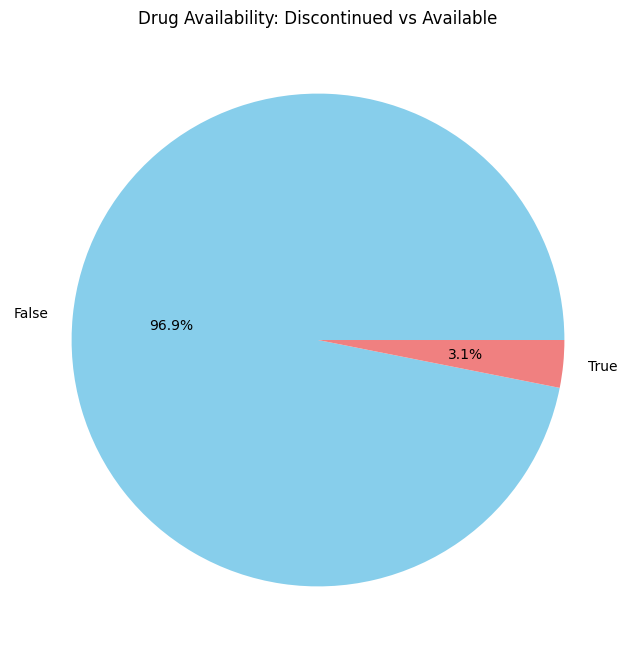

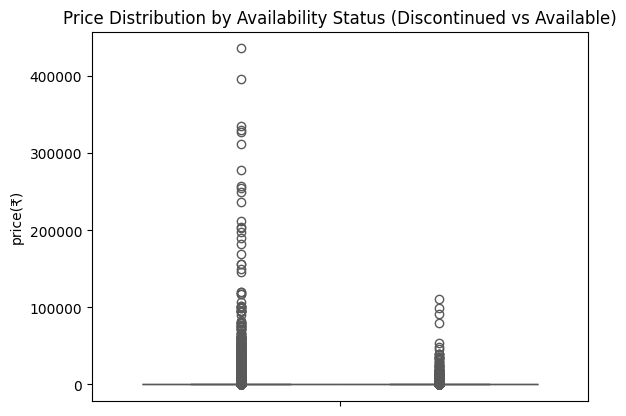

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of discontinued drugs
availability_counts = data['Is_discontinued'].value_counts()

# Plot availability status
availability_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=['skyblue', 'lightcoral'])
plt.title('Drug Availability: Discontinued vs Available')
plt.ylabel('')
plt.show()

# Investigate price trends for discontinued vs available drugs
sns.boxplot(hue='Is_discontinued', y='price(₹)', data=data, palette="Set2", legend = False)
plt.title('Price Distribution by Availability Status (Discontinued vs Available)')
plt.show()

I**nvestigate the price distribution and explore how pricing varies by drug type, manufacturer, and pack size.**

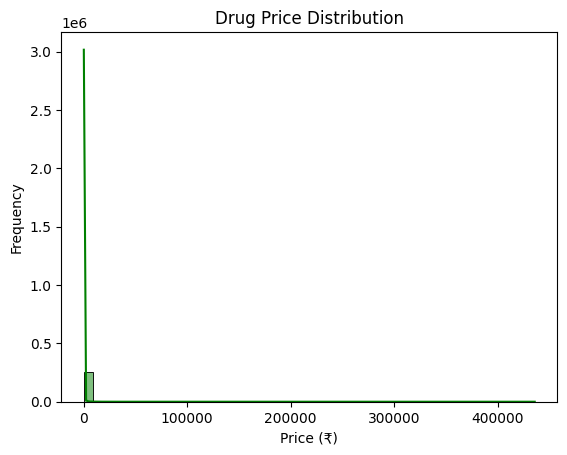

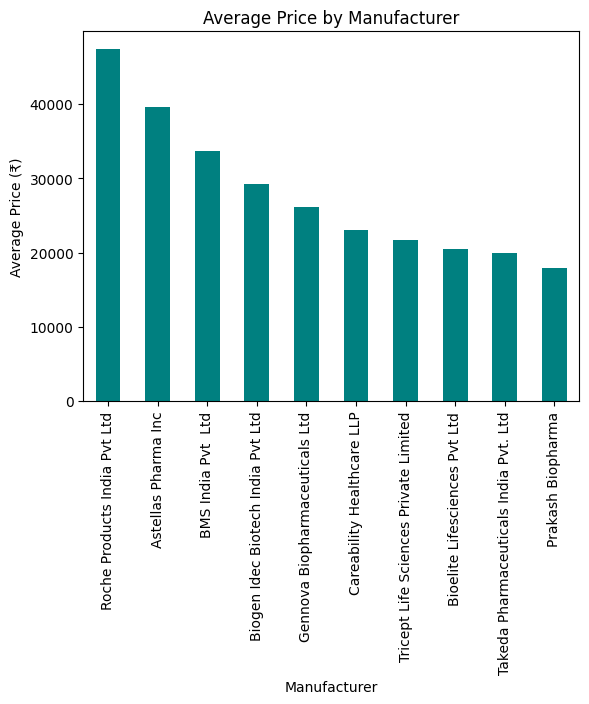

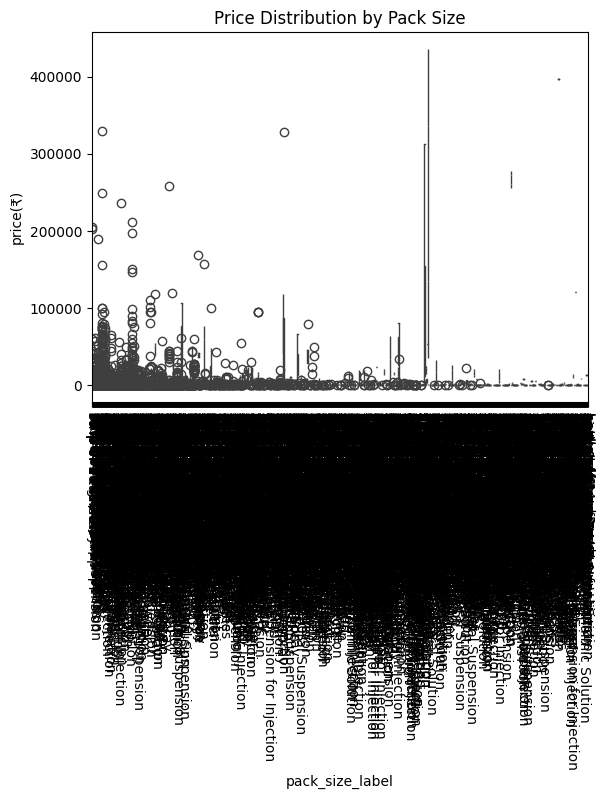

In [6]:
# Price distribution
sns.histplot(data['price(₹)'], bins=50, kde=True, color='green')
plt.title('Drug Price Distribution')
plt.xlabel('Price (₹)')
plt.ylabel('Frequency')
plt.show()

# Average price by manufacturer
avg_price_by_manufacturer = data.groupby('manufacturer_name')['price(₹)'].mean().sort_values(ascending=False)
avg_price_by_manufacturer.head(10).plot(kind='bar', color='teal')
plt.title('Average Price by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Average Price (₹)')
plt.show()

# Price distribution by pack size
sns.boxplot(x='pack_size_label', y='price(₹)', data=data)
plt.title('Price Distribution by Pack Size')
plt.xticks(rotation=-90)
plt.show()

**Investigate the active ingredients (composition) and how they are related to drug pricing**

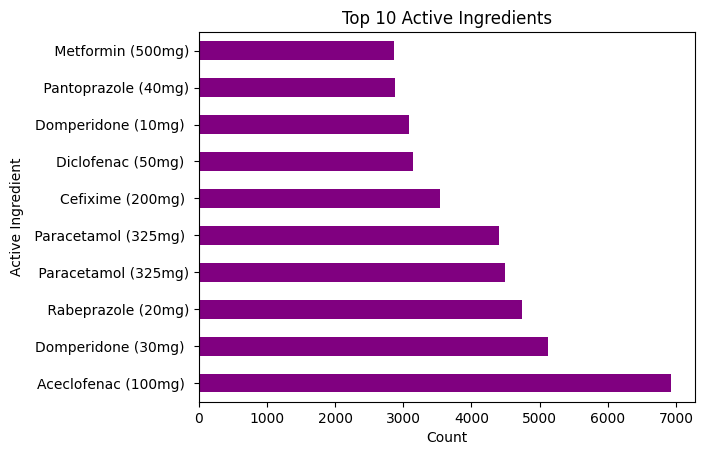

In [7]:
# Frequency of active ingredients (considering both composition columns)
composition_counts = pd.concat([data['short_composition1'], data['short_composition2']]).value_counts()

# Plot the top 10 most common compositions
composition_counts.head(10).plot(kind='barh', color='purple')
plt.title('Top 10 Active Ingredients')
plt.xlabel('Count')
plt.ylabel('Active Ingredient')
plt.show()

**Analyze the impact of manufacturer and pack size on drug pricing.**

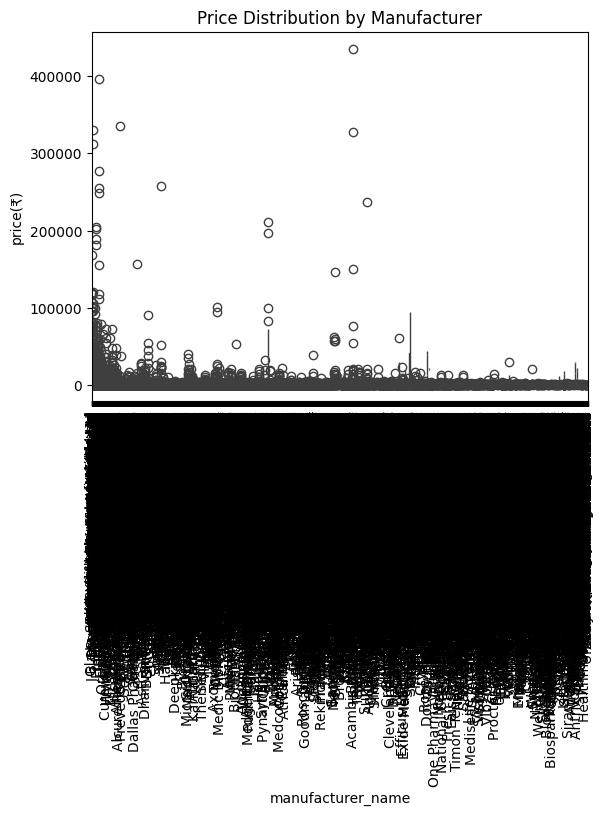

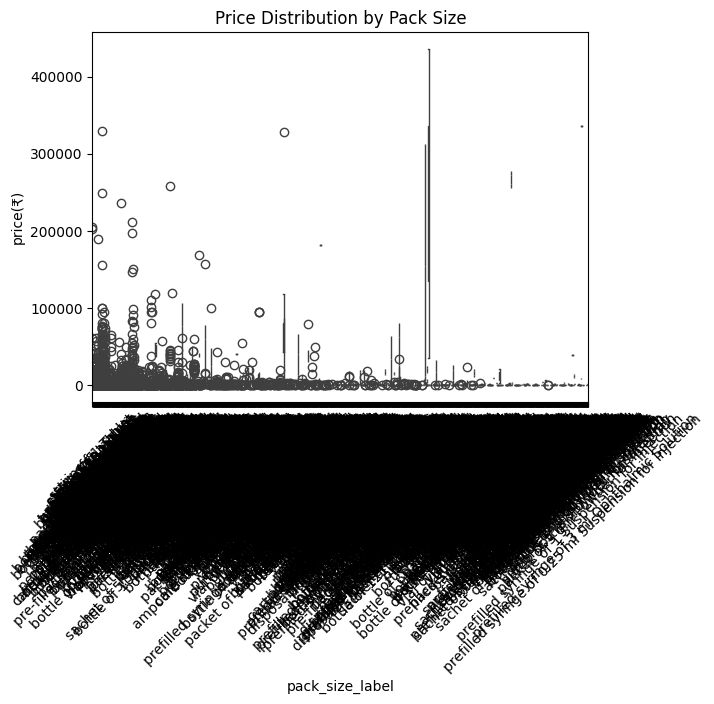

In [8]:
# Price distribution by manufacturer
sns.boxplot(x='manufacturer_name', y='price(₹)', data=data)
plt.title('Price Distribution by Manufacturer')
plt.xticks(rotation=90)
plt.show()

# Pack size effect on price
sns.boxplot(x='pack_size_label', y='price(₹)', data=data)
plt.title('Price Distribution by Pack Size')
plt.xticks(rotation=45)
plt.show()

**Price Prediction Using Machine Learning**

*Use machine learning models to predict drug prices based on available features like manufacturer name, type, pack size, and composition.*

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le = LabelEncoder()
data['manufacturer_name_encoded'] = le.fit_transform(data['manufacturer_name'])
data['type_encoded'] = le.fit_transform(data['type'])
data['pack_size_label_encoded'] = le.fit_transform(data['pack_size_label'])

# Select features and target
X = data[['manufacturer_name_encoded', 'type_encoded', 'pack_size_label_encoded']]
y = data['price(₹)']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 5985568.9639891805


**Manufacturer Analysis for Price Outliers**

In [12]:
# Identify manufacturers with price outliers
manufacturer_price_stats = data.groupby('manufacturer_name')['price(₹)'].describe()

# Display manufacturers with high variability in price
manufacturer_price_stats[manufacturer_price_stats['std'] > manufacturer_price_stats['std'].quantile(0.75)].sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
manufacturer_name,,,,,,,,
Roche Products India Pvt Ltd,46.0,47397.537391,85964.332826,5.98,2054.0000,10287.500,39966.2500,396725.00
Astellas Pharma Inc,9.0,39597.022222,111076.182463,234.00,685.2000,1000.000,5000.0000,335635.00
BMS India Pvt Ltd,24.0,33679.436250,59757.133400,65.00,717.8750,3182.500,32450.0000,211538.51
Biogen Idec Biotech India Pvt Ltd,4.0,29269.000000,44607.407651,50.00,192.5000,11370.000,40446.5000,94286.00
Gennova Biopharmaceuticals Ltd,6.0,26102.116667,18611.774431,307.70,12000.0000,33952.500,38351.2500,43900.00
...,...,...,...,...,...,...,...,...
Health Care Formulations Pvt Ltd,62.0,77.936774,149.078087,10.82,34.5375,51.680,74.8425,1199.00
Apple Biotech,20.0,76.549000,136.349164,5.35,20.3750,35.250,64.7500,630.00
Glories Pharmaceuticals Pvt Ltd,12.0,76.445833,125.797549,10.75,19.0750,26.450,60.7500,450.00


**Chi-Square Test**

In [13]:
from scipy.stats import chi2_contingency

In [14]:
#Create a contingency table
contingency_table = pd.crosstab(data['Is_discontinued'], data['manufacturer_name'])
print(contingency_table)

manufacturer_name  10 Drug Mart  3A Pharmaceuticals  \
Is_discontinued                                       
False                        26                   8   
True                          0                   0   

manufacturer_name  3C Health Solution Pvt Ltd  3D Healthcare  \
Is_discontinued                                                
False                                      27             56   
True                                        0              0   

manufacturer_name  3M India Limited  4Care Lifescience Pvt Ltd  \
Is_discontinued                                                  
False                             1                         46   
True                              0                          0   

manufacturer_name  4life Pharmaceuticals Pvt Ltd  6ipain Healthcare Pvt Ltd  \
Is_discontinued                                                               
False                                          9                         17   
True                

In [15]:
# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")

Chi-Square Statistic: 47627.71215757571
P-Value: 0.0
Degrees of Freedom: 7647


*Test 1: Is Discontinued Drugs Dependent on Manufacturer?*

In [16]:
contingency_table = pd.crosstab(data['Is_discontinued'], data['manufacturer_name'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

if p < 0.05:
    print("There is a significant association between drug availability and manufacturer.")
else:
    print("No significant association between drug availability and manufacturer.")

There is a significant association between drug availability and manufacturer.


*Test 2: Does Drug Type Depend on Pack Size?*

In [17]:
contingency_table = pd.crosstab(data['type'], data['pack_size_label'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

if p < 0.05:
    print("There is a significant association between drug type and pack size.")
else:
    print("No significant association between drug type and pack size.")

No significant association between drug type and pack size.
